<a href="https://colab.research.google.com/github/Anudeep0808/Amazon-alexa-reviews/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Create a classification model to predict the sentiment either (1 or 0) based
on Amazon Alexa reviews

**Details of features:**

Reviews: The verified reviews for the alexa

 Feedback: 1(Positive) or 0 (Negative)

**Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Importing dataset**

In [ ]:
dataset = pd.read_csv('amazon_alexa.csv')

**Data analysis**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    3150 non-null   object
 1   sentiment  3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [ ]:
dataset.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
dataset.tail()

,reviews,sentiment
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1
3149,Good,1


**Checking null values**



In [ ]:
dataset.isnull().any()
#No null values

reviews      False
sentiment    False
dtype: bool

**Bag of words model**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

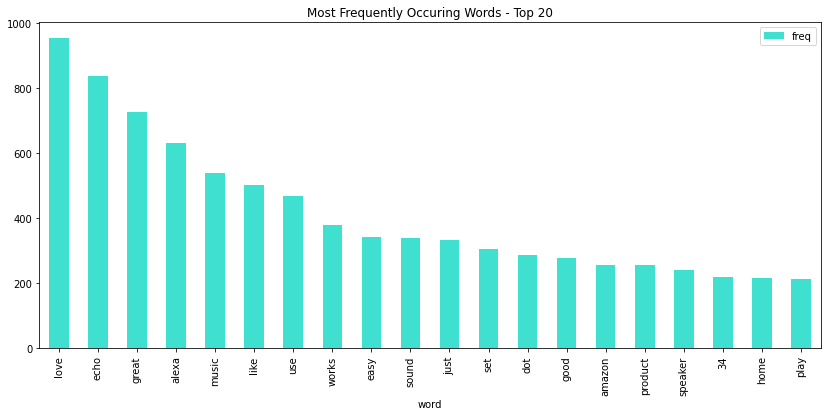

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.reviews)
x = words
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(14, 6), color = 'turquoise')
plt.title("Most Frequently Occuring Words - Top 20")

**Cleaning the texts**

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []

for i in range(0, 3150):
  review = re.sub('[^a-zA-Z]', ' ', dataset['reviews'][i])
  #converting to lower case
  review = review.lower()
  review = review.split()
  #Stopwords removal
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

**Bag of Words model implementation**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2700)

x = cv.fit_transform(corpus).toarray()

y = dataset.iloc[:, 1].values

**Common word image generator**

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

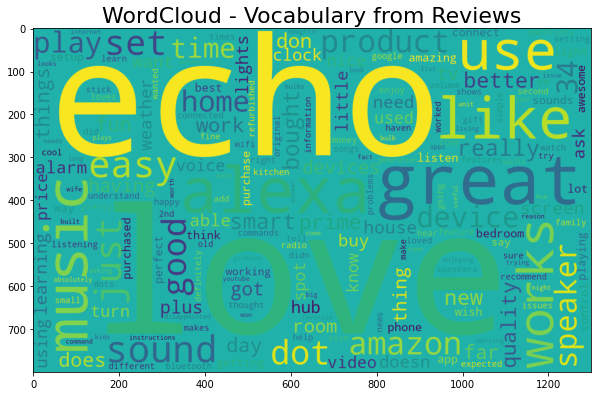

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightseagreen', width = 1300, height = 800).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

**Splitting dataset into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


LogisticRegression()

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9333333333333332
Standard Variance : 0.009187172145071596


prediction

In [ ]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


Confusion matrix for LR

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Accuracy check

Logistic Regression Accuracy Score:  0.9396825396825397
              precision    recall  f1-score   support

           0       0.86      0.35      0.50        54
           1       0.94      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.90      0.67      0.73       630
weighted avg       0.94      0.94      0.93       630



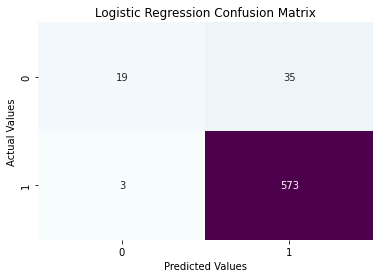

In [ ]:
print('Logistic Regression Accuracy Score: ',accuracy_score(Y_test,y_pred))
cm=my_confusion_matrix(Y_test, y_pred, 'Logistic Regression Confusion Matrix')

**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = Y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9222222222222222
Standard Variance : 0.006198610853894191


Prediction

In [ ]:
y_pred = knn.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


Accuracy check

KNN Classification Accuracy Score:  0.9222222222222223
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        54
           1       0.92      1.00      0.96       576

    accuracy                           0.92       630
   macro avg       0.96      0.55      0.56       630
weighted avg       0.93      0.92      0.89       630



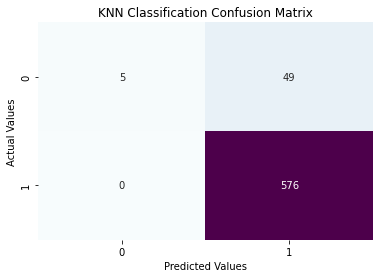

In [ ]:
print('KNN Classification Accuracy Score: ',accuracy_score(Y_test,y_pred))
cm=my_confusion_matrix(Y_test, y_pred, 'KNN Classification Confusion Matrix')

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train,Y_train)

MultinomialNB()

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = mb, X = X_train, y = Y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9261904761904761
Standard Variance : 0.005939138709165001


Prediction

In [ ]:
y_pred = mb.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


Accuracy check

Multinomial Navie Bayes Accuracy Score:  0.9365079365079365
              precision    recall  f1-score   support

           0       0.72      0.43      0.53        54
           1       0.95      0.98      0.97       576

    accuracy                           0.94       630
   macro avg       0.83      0.71      0.75       630
weighted avg       0.93      0.94      0.93       630



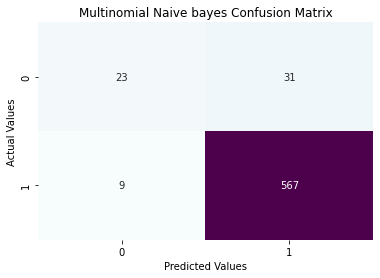

In [ ]:
print('Multinomial Navie Bayes Accuracy Score: ',accuracy_score(Y_test,y_pred))
cm=my_confusion_matrix(Y_test, y_pred, 'Multinomial Naive bayes Confusion Matrix')

**Sentiment Analysis**

In [ ]:
sentiments = SentimentIntensityAnalyzer()
dataset["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in dataset['reviews']]
dataset["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in dataset['reviews']]
dataset["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in dataset['reviews']]
x = sum(dataset["Positive"])
y = sum(dataset["Negative"])
z = sum(dataset["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996


**Conclusion:**

Logistic Regression gave the highest accuracy score of 0.9396825396825397

followed by Multinomial bayes and KNN classification

Therefore, most of the users feel nuetral about the amazon products

Almost 1936 users feel neutral about the products